# Вычисление объёма трёхмерной фигуры с помощью метода Монте-Карло

## 1. Подключение модулей

Подключим библиотеку hypersand для вычисления объема. Для простоты hypersand сократим до hs.

In [1]:
%matplotlib notebook
import hypersand as hs

## 2. Определение осей

Назовем оси для будущей фигуры: "x1", "x2" и "x3":

In [2]:
keys = ["x1",
        "x2",
        "x3"]

## 3. Генерация данных

Сгенерируем три синусоиды, состоящие из 10 периодов, с амплитудами от 4.5 до 5.5, сдвинутые вверх по оси y на 20, с частотой дискретизации 1e-2.

<IPython.core.display.Javascript object>


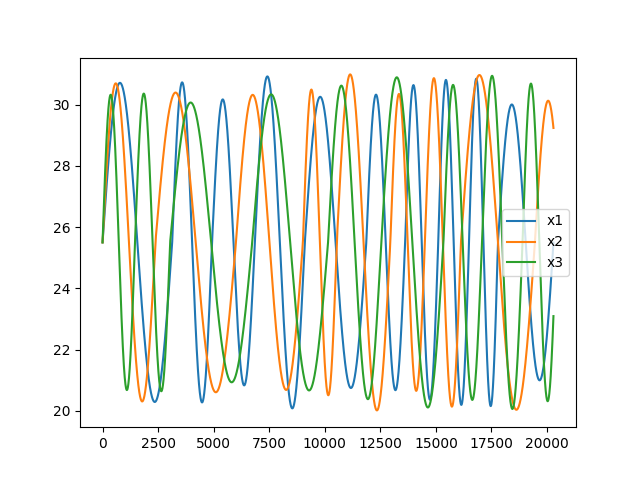

In [3]:
data = hs.generateDF(keys, periods=10, amplitudes=[4.5, 5.5], ground=20, sample_rate=1e-2)
data.plot()

## 4. Генерация случайных точек

Сгенерируем 100 случайных точек. Посмотрим, как наш график выглядит в фазовой плоскости. А так же, выведем сгенерированные точки.

<IPython.core.display.Javascript object>


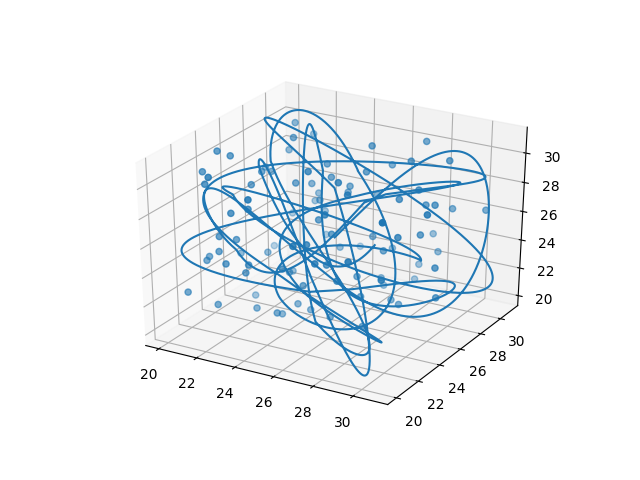

In [4]:
rp = hs.throw_points(data, 100)
hs.plt3d([data, rp], ["plot", "scatter"])

## 5. Пересечения для 0-й точки

Построим плоскости, параллельные осям x, y и z, пересекающие условную 0-ю точку, и найдем точки пересечения этих плоскостей с фигурой.

<IPython.core.display.Javascript object>


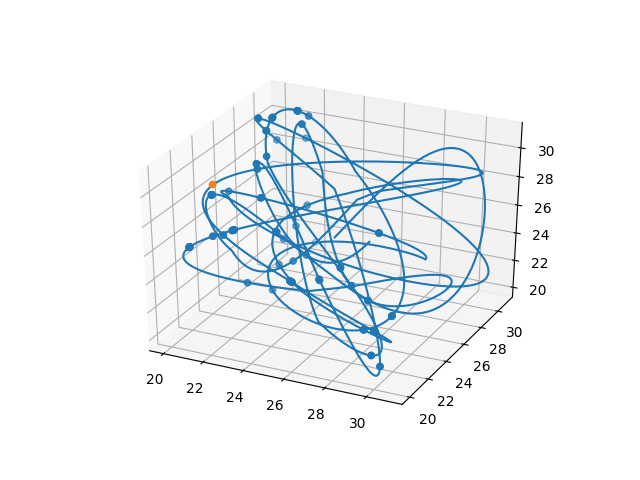

In [5]:
intersections = hs.get_intersections(data, rp.iloc[0], 1e-2)
hs.plt3d([data, intersections, rp.iloc[0]], ["plot", "scatter", "scatter"])

## 6. Определение попаданий

То же самое проделаем со всеми остальными точками. Если точка оказалась вне границ фигуры, будем считать, то она не попала в фигуру.

Важно: вычисления могут занять достаточно долгое время. В данном случае порядка 7 минут. Время зависит от размерности, общего количества точек в фигуре, количества случайно сгенерированных точек, а так же от производительности процессора.

<IPython.core.display.Javascript object>


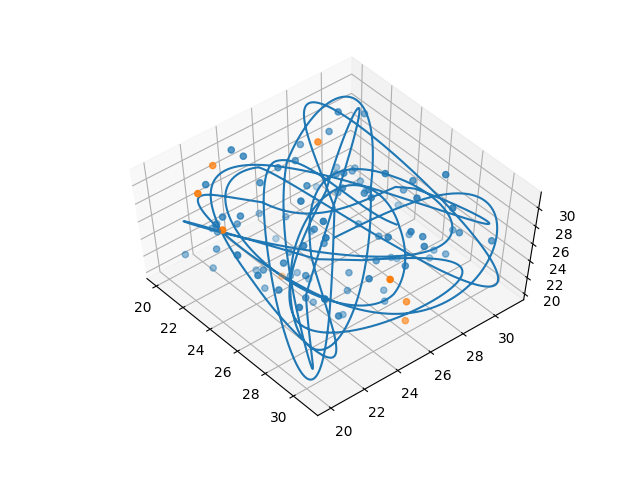

In [6]:
[hits, misses] = hs.hit_analysis(data, rp, 1e-2)
hs.plt3d([data, hits, misses], ["plot", "scatter", "scatter"])

## 7. Вычисление объёма

Вычислим объем внутренней части фигуры с помощью формулы: объем фигуры = объем параллелепипеда * количество попаданий / общее количество бросков.

In [7]:
volume = hs.cuboid_volume(data) * len(hits) / len(rp)
print(volume)

1189.0610842624226


Можно было пропустить пункты 5 и 6 - вызвать функцию, которая уже включает в себя операции из пунктов 5 и 6, и получить тот же ответ:

In [8]:
volume = hs.montecarlo(data, rp, 1e-2)
print(volume)

1189.0610842624226
